# Загрузка и анализ датасета

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Life Expectancy Data.csv")

In [3]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [5]:
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

## Пропуски

Т.к. пропуски только в числовых признаках, то заполним их медианными значениями

In [11]:
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

In [12]:
df.isna().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
Population                         0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

df.head()

In [13]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'Population', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

# Обучение модели

In [14]:
cat_cols = df.select_dtypes(include=['object']).columns
cat_indices = [df.columns.get_loc(col) for col in cat_cols]

In [15]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# df['Country']=le.fit_transform(df['Country'])
# df['Status']=le.fit_transform(df['Status'])

In [16]:
y = df['Life expectancy ']
x = df.drop(['Life expectancy '], axis=1)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2)

In [18]:
# %pip install catboost
from catboost import CatBoostRegressor

In [19]:
catboost_model = CatBoostRegressor(learning_rate = 0.1,iterations = 1000,
                                   depth=3,loss_function='RMSE',verbose=0)

In [20]:
import warnings
warnings.filterwarnings("ignore")

In [21]:
cat_indices

[0, 2]

In [22]:
catboost_model.fit(X_train, Y_train,cat_features=cat_indices,eval_set=(X_test, Y_test))
Y_pred = catboost_model.predict(X_test)

CatBoost Regressor RMSE 1.8885797703172436
CatBoost Regressor RMSPE 0.027252827414582615


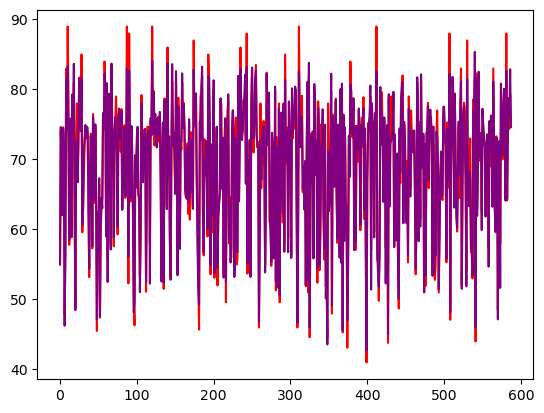

In [23]:
import matplotlib.pyplot as plt
print('CatBoost Regressor RMSE {}'.format(np.sqrt(mean_squared_error(Y_test,Y_pred))))
print('CatBoost Regressor RMSPE {}'.format(np.sqrt(np.mean(np.square(((Y_test - Y_pred) / Y_test)), axis=0))))
yx_points = np.array(range(len(Y_test)))
plt.plot(yx_points, Y_test, color='r')
plt.plot(yx_points, Y_pred, color = "purple")
plt.show()

# Интерпретация модели с помощью shapley values

In [24]:
# %pip install shap
import shap

In [25]:
explainercat = shap.TreeExplainer(catboost_model)
shap_values_cat_test = explainercat.shap_values(X_test)
shap_values_cat_train = explainercat.shap_values(X_train)

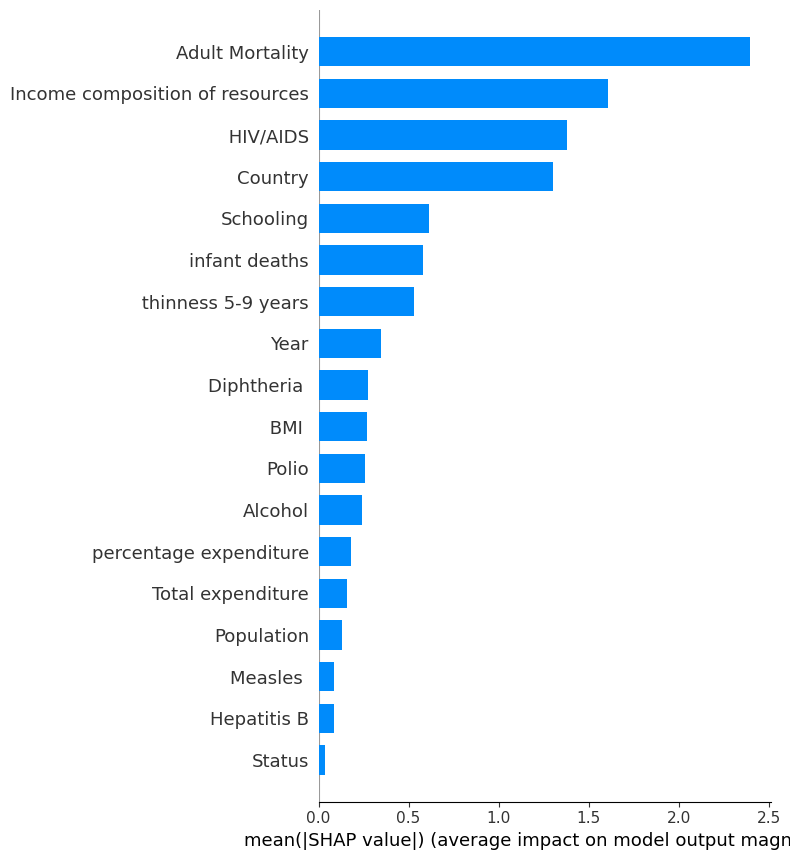

In [26]:
shap.summary_plot(shap_values_cat_train, X_train, plot_type="bar")

Как можно заметить, наиболее значимыми признаками, влиящими на продолжительность жизни являются:
1) Смертность среди взрослых (на 1.000 человек);
2) Нормализованный показатель валового национального дохода на душу населения (доступ к экономическим благам);
3) Смертность от ВИЧ/СПИД (на 1.000 человек) среди новорожденный (от 0 до 4х лет);
4) Страна проживания;
5) Количество лет обучения.

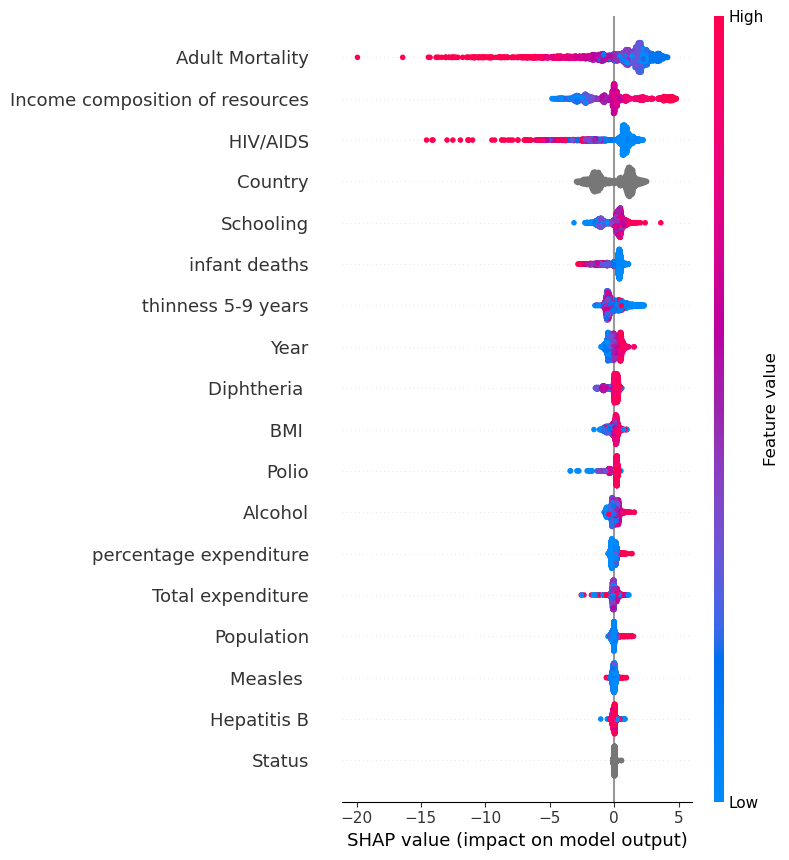

In [27]:
fig = plt.subplots(figsize=(6,6))

ax = shap.summary_plot(shap_values_cat_train, X_train, plot_type="dot")

Согласно данному графику признаки влияют следующим образом:
1) Чем выше смертность среди взрослых, тем, вероятнее, меньше проживет человек (логично);
2) Чем экономические блага доступнее, тем больше проживет человек;
3) Чем выше смертность от ВИЧ/СПИД (на 1.000 человек), тем меньше проживет человек;
4) Страна проживания является категориальным признаком и требует отдельного рассмотрения;
5) Чем дольше человек получал образование, тем он дальше проживет.

Проведем дополнительный анализ признака Country, т.к. он содержит много значений, то проверять будем для двух: Финляндии и Афганистана.

In [28]:
index_arr = []
countries = ["Afghanistan", "Armenia", "Australia", "Finland"]
for country in countries:
    index_arr += df.index[df["Country"] == f'{country}'].tolist()

result_df = df.loc[index_arr]

In [29]:
shap_values_cat_country = explainercat.shap_values(result_df)

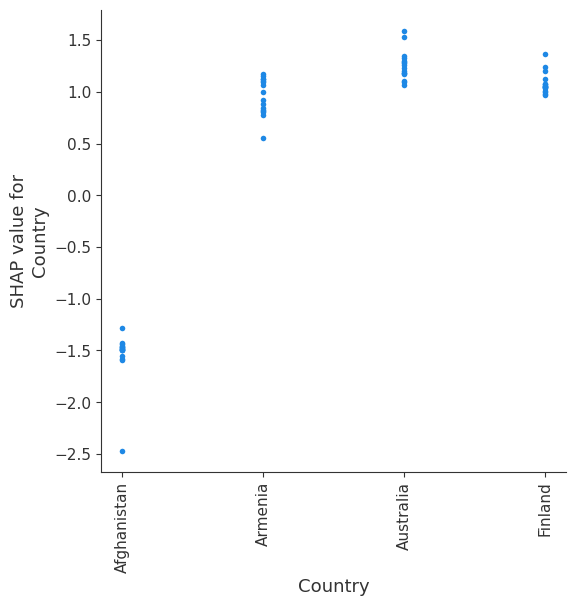

In [30]:
fig, ax = plt.subplots(figsize=(6,6),dpi=100)
shp_plt = shap.dependence_plot("Country", shap_values_cat_country, result_df,ax=ax,interaction_index=None)

Можно сделать вывод, что куда вероятнее, что в Финляндии человек проживет дольше, чем в Афганистане. 

Проведем анализ конкретного предсказания

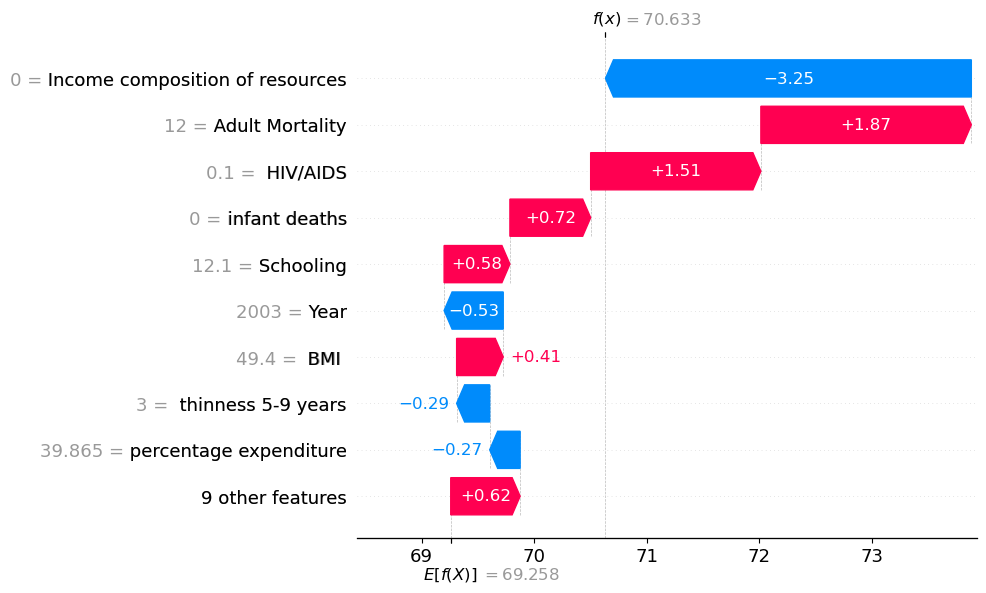

In [51]:
shap.plots.waterfall(explainercat(X_test)[3])

Согласно данному графику:
1) Низкий индекс доступности экономических ресурсов сказывается сугубо отрицательно;
2) Низкая смертность среди взрослых влияет положительно;
3) Низкая смертность среди новорожденных от ВИЧ/СПИД влияет положительно;
4) Фактически нулевая смертность среди детей сказывается аналогичным образом.

# Интерпретация модели с помощью LIME

In [32]:
# %pip install lime
import lime

In [33]:
import lime.lime_tabular

In [34]:
df_lime = df.copy()

In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_lime['Country']=le.fit_transform(df_lime['Country'])
df_lime['Status']=le.fit_transform(df_lime['Status'])

In [36]:
y = df_lime['Life expectancy ']
x = df_lime.drop(['Life expectancy '], axis=1)

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2)

In [38]:
catboost_model = CatBoostRegressor(learning_rate = 0.1,iterations = 1000,
                                   depth=3,loss_function='RMSE',verbose=0)

catboost_model.fit(X_train, Y_train, eval_set=(X_test, Y_test))
Y_pred = catboost_model.predict(X_test)

CatBoost Regressor RMSE 1.8894413047911667
CatBoost Regressor RMSPE 0.028844995538128748


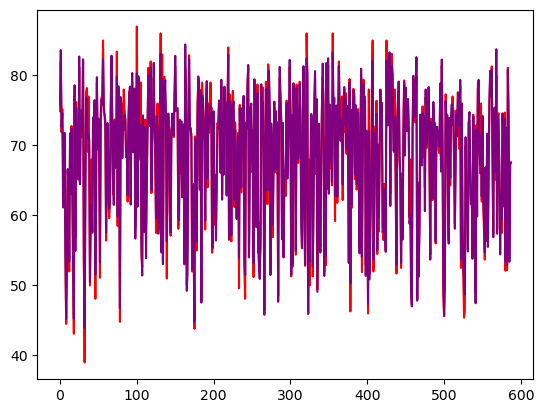

In [39]:
import matplotlib.pyplot as plt
print('CatBoost Regressor RMSE {}'.format(np.sqrt(mean_squared_error(Y_test,Y_pred))))
print('CatBoost Regressor RMSPE {}'.format(np.sqrt(np.mean(np.square(((Y_test - Y_pred) / Y_test)), axis=0))))
yx_points = np.array(range(len(Y_test)))
plt.plot(yx_points, Y_test, color='r')
plt.plot(yx_points, Y_pred, color = "purple")
plt.show()

In [40]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values,
                                                   feature_names=list(X_train.columns),
                                                   class_names=['Life expectancy '],
                                                  #  categorical_features=cat_indices,
                                                  #  categorical_names=cat_cols.values.tolist(),
                                                   mode='regression',
                                                   kernel_width=10,
                                                   verbose=True)

In [41]:
j = 5
exp = explainer.explain_instance(X_test.values[j], catboost_model.predict, num_features=12)

Intercept 65.22794822980791
Prediction_local [75.66941127]
Right: 66.59885337988763


In [42]:
exp.show_in_notebook(show_table=True)

![alt](./static/img1.png)

По данному графику можно сделать вывод, что для данного предсказания:
1) Низкие показатели смертности от ВИЧ/СПИД вносят наибольший вклад в продолжительность жизни, как и низкая смертность среди взрослых;
2) 11 лет обучения благоприятный вклад в предсказание;
3) Доля вакцинированных в стране от полиомиелита в 98% способствует увеличенному сроку жизни.

In [43]:
X_test.values[j]

array([1.77000000e+02, 2.01400000e+03, 1.00000000e+00, 2.17000000e+02,
       7.00000000e+00, 2.90000000e+00, 6.91133353e+02, 9.70000000e+01,
       0.00000000e+00, 4.77000000e+01, 9.80000000e+01, 2.70000000e+00,
       9.80000000e+01, 1.00000000e-01, 5.46624100e+06, 3.30000000e+00,
       6.83000000e-01, 1.08000000e+01])

Увеличив первые два параметра, можно наблюдать, как изменится предсказание:

In [59]:
new_obj = np.array([1.77000000e+02, 2.01400000e+03, 1.00000000e+00, 4.17000000e+02,
       7.00000000e+00, 6.58000000e+00, 1.71222551e+03, 9.50000000e+01,
       0.00000000e+00, 4.77000000e+01, 9.50000000e+01, 1.11700000e+01,
       9.50000000e+01, 1.00000000e-00, 3.33143000e+05, 1.60000000e+00,
       7.56000000e-01, 1.08000000e+01])

exp = explainer.explain_instance(new_obj, catboost_model.predict, num_features=12)
exp.show_in_notebook(show_table=True)

Intercept 71.80603808955783
Prediction_local [60.69664086]
Right: 61.424575711193626


![alt](./static/img2.png)

# Интерпретация с помощью ELI5

In [46]:
# %pip install eli5
import eli5

Note: you may need to restart the kernel to use updated packages.


In [47]:
columns = X_train.columns.values
eli5.show_weights(catboost_model, feature_names=columns)

Weight,Feature
0.3397,HIV/AIDS
0.2151,Adult Mortality
0.1315,Income composition of resources
0.0657,Schooling
0.0530,Status
0.0334,infant deaths
0.0297,BMI
0.0293,thinness 5-9 years
0.0212,Country
0.0200,Diphtheria


Согласно ELI5 наиважнейшими признаками являются:
1) Смертность от ВИЧ/СПИД среди новорожденных;
2) Смертность среди взрослых;
3) Индекс доступности экономических ресурсов;
4) Продолжительность обучения;
5) Является ли страна экономически развитой.

# Вывод

1) Был проведен анализ датасета о средней продолжительности жизни;
2) Была проведена подготовка данных;
3) Была обучена модель catboost;
4) С помощью алгоритмов SHAP, LIME и ELI5 была проведена интерпретация предсказаний и поведения модели;
5) Были определены наиболее влияющие на продолжительность жизни признаки, такие как: смертость среди взрослых, среди новорожденных от ВИЧ/СПИД, доступность экономических ресурсов и время, потраченное на обучение.